# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
# Step 1: 导入常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 设置样式
sns.set(style="whitegrid")
%matplotlib inline

# 读取数据
df = pd.read_csv('./data/train.csv')

# 查看数据结构
print("数据维度:", df.shape)
df.head()
df['Age_years'] = df['Age'] / 365

数据维度: (7905, 20)


In [2]:
# Step 2: 初步分析
print("\n数据类型和缺失值情况：")
print(df.info())

print("\n描述性统计：")
print(df.describe())

print("\n分类变量分布（前5个）：")
for col in df.select_dtypes(include='object').columns[:5]:
    print(df[col].value_counts())
    print("------")



数据类型和缺失值情况：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64


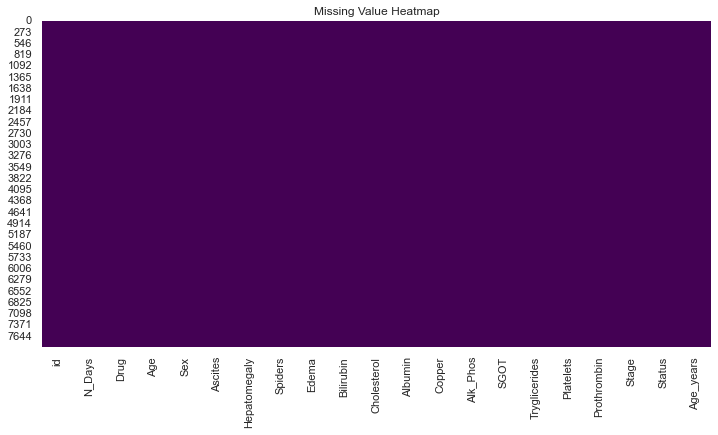

Missing Value Heatmap：
Series([], dtype: float64)


In [3]:
# Step 3: 可视化缺失值情况
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()

# 缺失比例
missing = df.isnull().mean().sort_values(ascending=False)
print("Missing Value Heatmap：")
print(missing[missing > 0])

#运行结果说明：数据中无缺失值

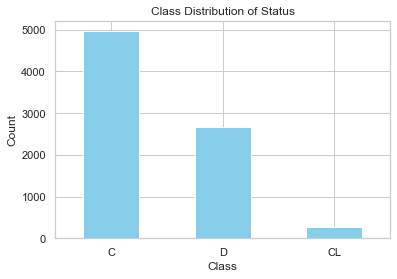

Class Proportions:
C     0.628083
D     0.337128
CL    0.034788
Name: Status, dtype: float64


In [4]:
# Step 4: 查看目标变量分布
# Step 4: Check target variable distribution
df['Status'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Class Distribution of Status")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Display class proportions
print("Class Proportions:")
print(df['Status'].value_counts(normalize=True))


输出结果说明了你的目标变量 Status 是一个严重不平衡的多分类问题，我们来具体解读一下：
CL 类的样本极少，仅占不到 4%，这是一个严重长尾类别，需要特别处理。

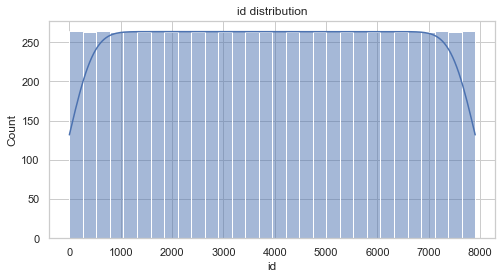

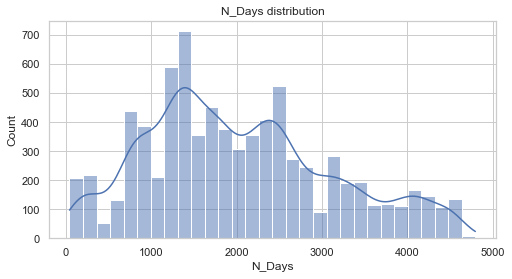

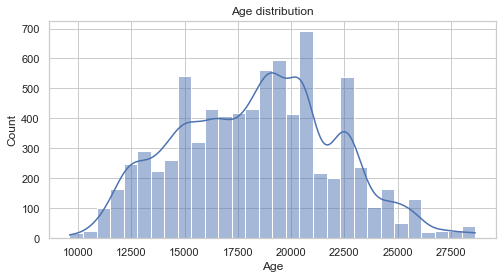

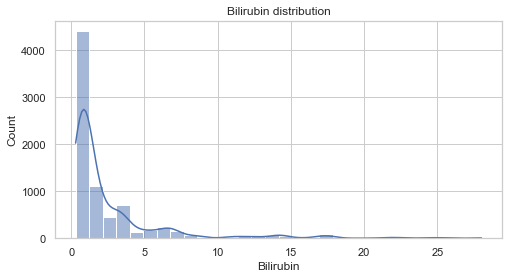

In [5]:
# Step 5: 可视化几个关键数值特征的分布（如有）
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 示例绘图：前4个数值特征的分布
for col in num_cols[:4]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"{col} distribution")
    plt.show()


In [6]:
# Step 6: 拆分特征和目标
X = df.drop(columns=['Status'])
y = df['Status']

print("特征维度：", X.shape)
print("目标变量类别数：", y.nunique())

特征维度： (7905, 20)
目标变量类别数： 3


In [7]:
#建模前的最后准备
from sklearn.preprocessing import LabelEncoder, StandardScaler

test_df = pd.read_csv("./data/test.csv")

# Step 1: Drop ID column if it exists
X = X.drop(columns=['id'], errors='ignore')

# Step 2: Convert Age from days to years (if not already converted)
if X['Age'].max() > 200:  # sanity check
    X['Age'] = X['Age'] / 365

# Step 3: Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 4: Scale numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols)

# Step 5: Encode categorical features
X_encoded = X_scaled.copy()
categorical_cols = X.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))

# Step 6: Add encoded target
X_encoded['Status'] = y_encoded

# Step 7: Save to CSV
X_encoded.to_csv("./data/X_train_processed.csv", index=False)

print("Saved processed data:", X_encoded.shape)
X_encoded.head()



Saved processed data: (7905, 20)


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age_years,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,-0.942430,0.858448,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,-0.037522,0.858448,0,1,0,0,0,0,2
1,0.497025,0.234760,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,-0.037522,0.234760,1,0,0,0,0,0,0
2,1.277529,-1.262634,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,1.116605,-1.262634,1,0,0,1,1,2,2
3,0.498852,0.023603,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,-0.037522,0.023603,1,0,0,0,0,0,0
4,-1.135271,-0.466107,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,1.116605,-0.466107,1,0,0,1,0,0,0


## 🧾 说明：X_train_processed.csv 数据集结构与预处理说明

### ✅ 一、这是一份怎样的表格？

这是一个经过预处理的训练数据集，已准备好用于多分类机器学习任务。主要特点包括：

- 所有数值特征均已使用 `StandardScaler` 标准化（均值为0，方差为1）
- 所有类别特征均使用 `LabelEncoder` 数值化（字符串变整数）
- 每一行代表一位肝硬化患者的观测数据
- 最后一列 `Status` 是三分类目标变量，编码为 0、1、2，分别代表：
  - `0` → C（Censored，仍然存活）
  - `1` → CL（Censored with Liver transplant，肝移植存活）
  - `2` → D（Deceased，死亡）

---

### 📊 二、各列字段释义

#### 数值型特征（已标准化）
| 列名           | 含义                                       |
|----------------|--------------------------------------------|
| N_Days         | 随访时间（单位：天）                       |
| Age            | 年龄（已转化为年）                          |
| Bilirubin      | 总胆红素（肝功能指标）                     |
| Cholesterol    | 胆固醇水平                                  |
| Albumin        | 白蛋白含量（反映肝脏合成功能）              |
| Copper         | 铜元素浓度                                  |
| Alk_Phos       | 碱性磷酸酶                                  |
| SGOT           | 谷草转氨酶                                  |
| Tryglicerides  | 甘油三酯                                     |
| Platelets      | 血小板数量                                   |
| Prothrombin    | 凝血酶原时间（肝脏合成功能）                |
| Stage          | 肝纤维化分期（1~4）                         |
| Age_years      | 年龄（未标准化，临时列，**建议删除以避免重复**） |

#### 类别型特征（已 Label 编码为整数）
| 列名         | 原始含义                        | 编码含义                  |
|--------------|----------------------------------|---------------------------|
| Drug         | 用药（Placebo / D-penicillamine）| 0 = Placebo, 1 = D-pen    |
| Sex          | 性别                             | 0 = Female, 1 = Male      |
| Ascites      | 是否腹水                         | 0 = N, 1 = Y              |
| Hepatomegaly | 是否肝肿大                       | 0 = N, 1 = Y              |
| Spiders      | 是否有蜘蛛痣                     | 0 = N, 1 = Y              |
| Edema        | 水肿程度                         | 0 = 无, 1 = 轻微, 2 = 明显 |

#### 目标变量
| 列名   | 含义                        | 编码 |
|--------|-----------------------------|------|
| Status | 患者最终状态（多分类目标） | 0=C, 1=CL, 2=D |

---

### 🔧 三、你对原始数据做了哪些预处理？

| 步骤                        | 操作内容                                       | 目的                             |
|-----------------------------|------------------------------------------------|----------------------------------|
| 删除 ID 列                  | `X.drop(columns=['id'])`                       | 移除无意义的标识列                |
| 年龄单位转换                | `X['Age'] = X['Age'] / 365`                    | 便于理解和处理，转为“年”单位       |
| Label 编码类别变量          | `LabelEncoder` 处理 `Sex`, `Drug` 等           | 模型只能处理数值型特征            |
| 数值标准化                  | `StandardScaler` 对所有 float/int 列处理       | 使特征具有统一尺度                |
| 合并目标变量并导出为 CSV    | `X_encoded['Status'] = y_encoded`              | 保留目标列，保存为训练集文件       |



In [11]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

#读文件
df = pd.read_csv("./data/X_train_processed.csv")

# 拆分特征和标签
X = df.drop(columns=['Status']).values
y = df['Status'].values

# 划分训练集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 转为 tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)

# 构造 Dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

#模型在这
class FaceClassifier(nn.Module):
    def __init__(self, input_size, output_size=3, droput_rate=0.3):
        super(FaceClassifier, self).__init__()
        self.hidden_layers = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(droput_rate),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(droput_rate),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(droput_rate),

        
        )
        self.output_layer = nn.Linear(256, output_size)

    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x

#初始化
input_size = X.shape[1]
model = FaceClassifier(input_size=input_size, output_size=3)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#validate_model
def validate_model(model, val_loader):
    model.eval()
    correct = 0
    total = 0
    precision = 0
    recall = 0
    f1 = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            preds = model(xb)
            _, predicted = torch.max(preds, dim=1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)
            
            # 计算其他指标
            precision += precision_score(yb.cpu(), predicted.cpu(), average='weighted', zero_division=1)
            recall += recall_score(yb.cpu(), predicted.cpu(), average='weighted', zero_division=1)
            f1 += f1_score(yb.cpu(), predicted.cpu(), average='weighted', zero_division=1)

    accuracy = correct / total
    avg_precision = precision / len(val_loader)
    avg_recall = recall / len(val_loader)
    avg_f1 = f1 / len(val_loader)

    print(f"Validation Accuracy: {accuracy:.2%}")
    print(f"Validation Precision: {avg_precision:.2f}")
    print(f"Validation Recall: {avg_recall:.2f}")
    print(f"Validation F1 Score: {avg_f1:.2f}")
    return accuracy

#训练
for epoch in range(10):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Training Loss: {total_loss:.4f}")
    validate_model(model, val_loader)

Epoch 1, Training Loss: 112.4892
Validation Accuracy: 79.82%
Validation Precision: 0.82
Validation Recall: 0.80
Validation F1 Score: 0.78
Epoch 2, Training Loss: 103.5670
Validation Accuracy: 80.08%
Validation Precision: 0.82
Validation Recall: 0.80
Validation F1 Score: 0.78
Epoch 3, Training Loss: 102.0431
Validation Accuracy: 81.21%
Validation Precision: 0.83
Validation Recall: 0.81
Validation F1 Score: 0.80
Epoch 4, Training Loss: 100.6308
Validation Accuracy: 80.33%
Validation Precision: 0.82
Validation Recall: 0.80
Validation F1 Score: 0.78
Epoch 5, Training Loss: 100.1624
Validation Accuracy: 80.52%
Validation Precision: 0.82
Validation Recall: 0.80
Validation F1 Score: 0.79
Epoch 6, Training Loss: 97.7260
Validation Accuracy: 81.47%
Validation Precision: 0.83
Validation Recall: 0.81
Validation F1 Score: 0.80
Epoch 7, Training Loss: 96.1160
Validation Accuracy: 81.21%
Validation Precision: 0.83
Validation Recall: 0.81
Validation F1 Score: 0.80
Epoch 8, Training Loss: 94.9144
Vali

CatBoost MAE: 0.4476
------ CatBoost Model Detailed Evaluation ------
MAE: 0.4476
MSE: 0.4227
RMSE: 0.6501
R² Score: 0.5315


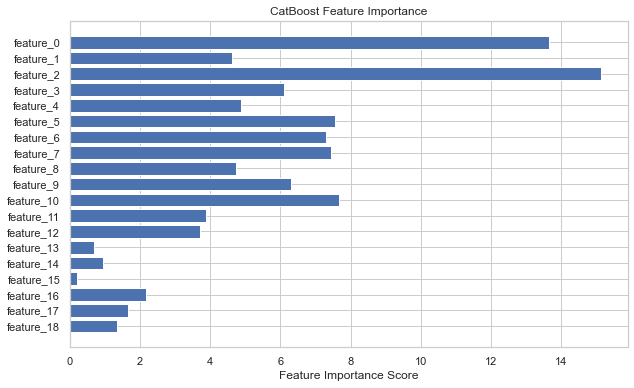

In [12]:
# ---------------------------------------------------
# Section by Mingxin Cao
# Model 3: CatBoost Regressor
# ---------------------------------------------------

from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

cat_model = CatBoostRegressor(verbose=0, random_state=42)

# train
cat_model.fit(X_train, y_train)

# prediction
y_pred_cat = cat_model.predict(X_val)

# assessment
mae = mean_absolute_error(y_val, y_pred_cat)
print(f"CatBoost MAE: {mae:.4f}")

# More evaluations
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_val, y_pred_cat)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred_cat)

print("------ CatBoost Model Detailed Evaluation ------")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Visualization of Feature Importance
import matplotlib.pyplot as plt

features = [f'feature_{i}' for i in range(X_train.shape[1])]
importances = cat_model.get_feature_importance()

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance Score")
plt.title("CatBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()